In [ ]:
pip install mlxtend

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = {
    'Soda':      [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
    'Chips':     [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
    'Cookies':   [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
    'Juice':     [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
    'Nuts':      [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Water':     [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
    'Chocolate': [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
}
df=pd.DataFrame(data)

In [ ]:
df

,Soda,Chips,Cookies,Juice,Nuts,Water,Chocolate
0,1,0,1,0,1,1,0
1,0,1,1,0,1,0,1
2,1,1,0,1,0,1,0
3,1,1,1,1,0,1,0
4,0,0,1,0,1,1,1
5,1,0,0,1,1,0,1
6,0,1,1,1,0,0,1
7,1,1,0,0,1,1,0
8,1,1,0,1,0,1,1
9,0,0,1,1,1,0,1


In [ ]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.583333,(Soda)
1,0.666667,(Chips)
2,0.583333,(Cookies)
3,0.583333,(Juice)
4,0.583333,(Nuts)
5,0.666667,(Water)
6,0.583333,(Chocolate)
7,0.500000,"(Soda, Water)"
8,0.500000,"(Chips, Water)"


In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(Soda),(Water),0.5,0.857143,1.285714
1,(Water),(Soda),0.5,0.750000,1.285714
2,(Chips),(Water),0.5,0.750000,1.125000
3,(Water),(Chips),0.5,0.750000,1.125000


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

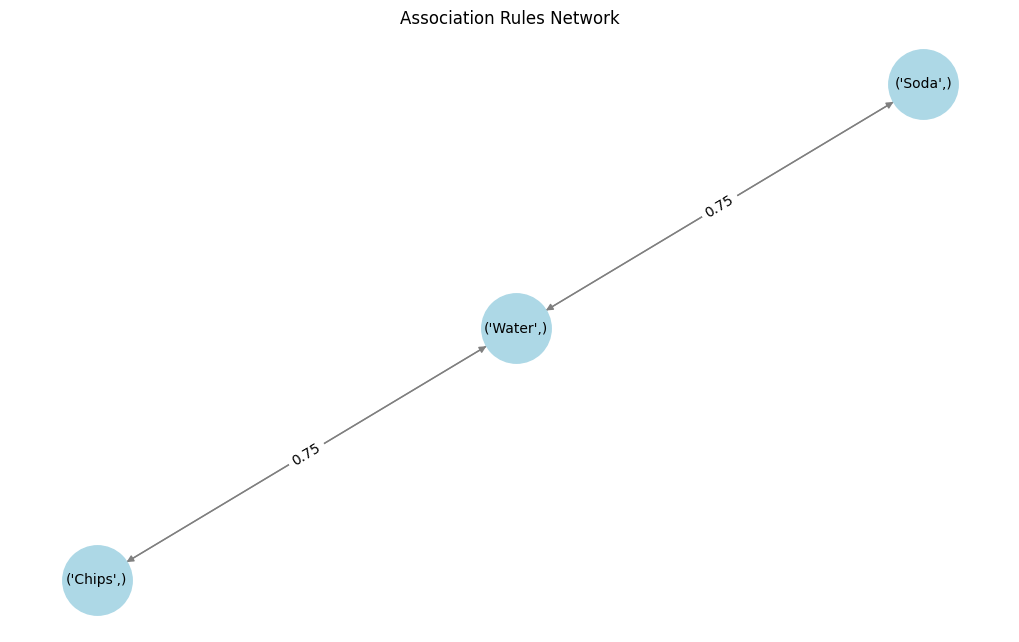

In [ ]:
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['confidence'])
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2500, font_size=10)
edge_labels = {(tuple(row['antecedents']), tuple(row['consequents'])): f"{row['confidence']:.2f}"
               for _, row in rules.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rules Network")
plt.show()